In [3]:
import os
print(os.getcwd())


f:\Zeynab Goloooo\PowerBI Pack\Github Projects\ecommerce-behavior-analysis\notebooks


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 


# Appearance settings
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"]=(12,6)

# Reading the data file

# OLD CODE (Commented out):
#df=pd.read_csv("../data/2019-Oct.csv",nrows=3000000)

# NEW OPTIMIZED CODE:
# We use the sampled parquet file generated in the optimization step
df=pd.read_parquet('../data/sample.parquet')
df.head()

# Checking data dimensions
print("Data dimensions:", df.shape)
print("Data columns:", df.columns)
print("Number of columns: ", df.shape[1])
print("Number of rows: ",df.shape[0])

# Checking data types and number of missing values
df.info()
df.isnull().sum()

# Checking the uniqueness of user_id and products_id
print("Unique user IDs:", df['user_id'].nunique())
print("Unique Products IDs:", df['product_id'].nunique())


# Check the data time frame
df['event_time'] = pd.to_datetime(df['event_time'])
print("Data time frame:", df['event_time'].min(), "to", df['event_time'].max())
df.head()

Data dimensions: (100000, 9)
Data columns: Index(['event_time', 'event_type', 'product_id', 'category_id',
       'category_code', 'brand', 'price', 'user_id', 'user_session'],
      dtype='object')
Number of columns:  9
Number of rows:  100000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   event_time     100000 non-null  object 
 1   event_type     100000 non-null  object 
 2   product_id     100000 non-null  int64  
 3   category_id    100000 non-null  int64  
 4   category_code  68235 non-null   object 
 5   brand          85581 non-null   object 
 6   price          100000 non-null  float64
 7   user_id        100000 non-null  int64  
 8   user_session   100000 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 6.9+ MB
Unique user IDs: 91434
Unique Products IDs: 27952
Data time frame: 2019-10-01 00:04:30+00

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-10-01 00:04:30+00:00,view,15100214,2053013557024391671,None,None,746.48,519107250,566511c2-e2e3-422b-b695-cf8e6e792ca8
1,2019-10-01 00:12:39+00:00,view,1003769,2053013555631882655,electronics.smartphone,huawei,463.07,537949394,4f2a5505-580d-4332-bfde-e76f27c60452
2,2019-10-01 02:19:42+00:00,view,1004249,2053013555631882655,electronics.smartphone,apple,739.81,553985695,88251aa8-2167-4129-90bb-05cde4443605
3,2019-10-01 02:19:44+00:00,view,3600661,2053013563810775923,appliances.kitchen.washer,samsung,295.49,522590962,2c53d889-dd25-473b-83f3-28fe1330575e
4,2019-10-01 02:22:16+00:00,view,12709470,2053013553559896355,None,matador,43.24,549595950,d8f97605-cc8c-4b7c-b1d5-15e0f5815b11


In [5]:
#%pip install imagehash
import imagehash

# cleaning data (formatting; duplicated; missing values):

#1 A look at the overall data structure
df.describe()
df.info()
df.head()

#2 Checking for missing values
print("Number of Null Values: ", df.isnull().sum())

#3 Dropping rows with missing values
#df.dropna(inplace=True)

#4 Checking for duplicates
print("number of duplicates rows:",df.duplicated().sum())
df=df.drop_duplicates()
print("Number of Null Values: ", df.isnull().sum())

#5 checking the number of unique values in the key column
print("unique user Id:" ,df['user_id'].nunique())
print("unique Product Id:" ,df['product_id'].nunique())
print("unique event type:" ,df['event_type'].nunique())
df.head()

#6 extract date and time
df['event_date']=df['event_time'].dt.date
df['event_hour']=df['event_time'].dt.hour
df.head()






<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype              
---  ------         --------------   -----              
 0   event_time     100000 non-null  datetime64[ns, UTC]
 1   event_type     100000 non-null  object             
 2   product_id     100000 non-null  int64              
 3   category_id    100000 non-null  int64              
 4   category_code  68235 non-null   object             
 5   brand          85581 non-null   object             
 6   price          100000 non-null  float64            
 7   user_id        100000 non-null  int64              
 8   user_session   100000 non-null  object             
dtypes: datetime64[ns, UTC](1), float64(1), int64(3), object(4)
memory usage: 6.9+ MB
Number of Null Values:  event_time           0
event_type           0
product_id           0
category_id          0
category_code    31765
brand            14419
price           

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,event_date,event_hour
0,2019-10-01 00:04:30+00:00,view,15100214,2053013557024391671,None,None,746.48,519107250,566511c2-e2e3-422b-b695-cf8e6e792ca8,2019-10-01,0
1,2019-10-01 00:12:39+00:00,view,1003769,2053013555631882655,electronics.smartphone,huawei,463.07,537949394,4f2a5505-580d-4332-bfde-e76f27c60452,2019-10-01,0
2,2019-10-01 02:19:42+00:00,view,1004249,2053013555631882655,electronics.smartphone,apple,739.81,553985695,88251aa8-2167-4129-90bb-05cde4443605,2019-10-01,2
3,2019-10-01 02:19:44+00:00,view,3600661,2053013563810775923,appliances.kitchen.washer,samsung,295.49,522590962,2c53d889-dd25-473b-83f3-28fe1330575e,2019-10-01,2
4,2019-10-01 02:22:16+00:00,view,12709470,2053013553559896355,None,matador,43.24,549595950,d8f97605-cc8c-4b7c-b1d5-15e0f5815b11,2019-10-01,2


  event_type  user_id
0       cart     2212
1   purchase     1638
2       view    88027


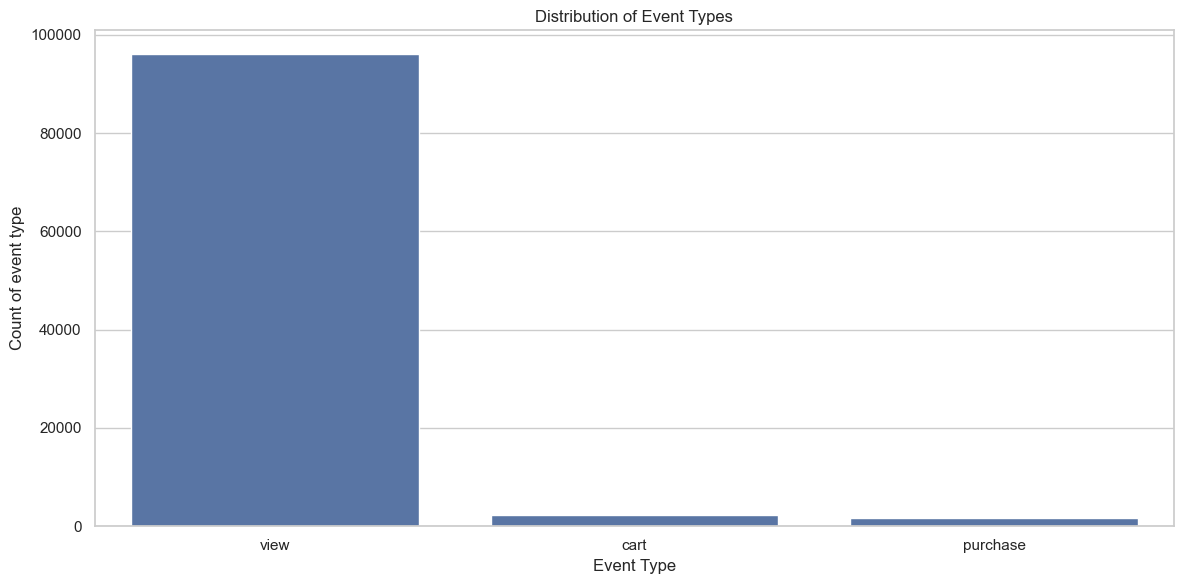

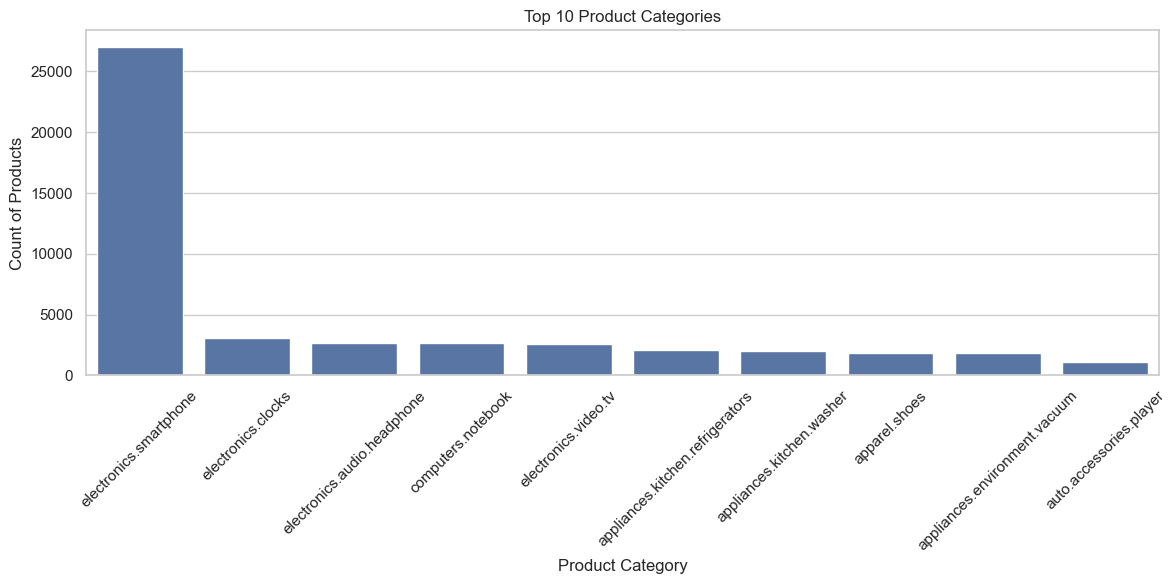

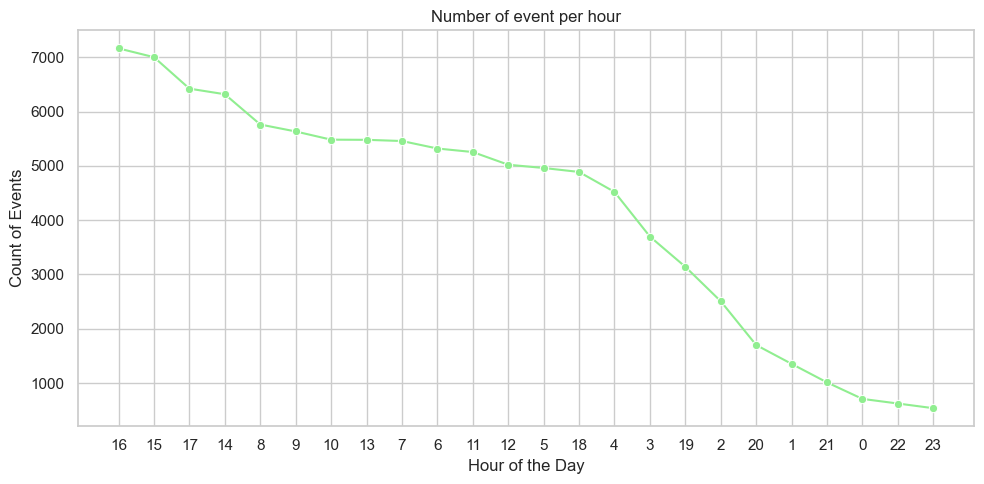

conversion_rate:  1.9 %


In [6]:
# Exploratory Data Analysis - EDA

import sys
import os
sys.path.append(os.path.abspath('../'))
from src.Utils import save_plot

#1 Number of unique users for each event type
user_count=df.groupby('event_type')['user_id'].nunique().reset_index()
print(user_count)


#2 Distribution of event types
event_count=df['event_type'].value_counts(dropna=False)
sns.barplot(x=event_count.index,y=event_count.values)   
plt.title('Distribution of Event Types')
plt.xlabel('Event Type')
plt.ylabel('Count of event type')
save_plot('evetType_distrb.png',show=True)


#3 Most popular product categories (Top 10)
category_count=df['category_code'].value_counts().head(10)
sns.barplot(x=category_count.index,y=category_count.values)
plt.title('Top 10 Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Count of Products')
plt.xticks(rotation=45)
save_plot('Top_10_Product_Categories.png',show=True)


#4 Number of events per hour
hourly_events=df.groupby('event_hour')['event_type'].size().reset_index(name='count').sort_values(by='count',ascending=False)
hourly_events['event_hour']=hourly_events['event_hour'].astype(str)
plt.figure(figsize=(10,5))
sns.lineplot(data=hourly_events, x='event_hour', y='count', marker='o', color='lightgreen')
plt.title('Number of event per hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Count of Events')
plt.grid(True)
save_plot('event_per_hour.png')

#5 Conversion Rate Visit →  Purchase
num_view_users=df[df['event_type']=='view']['user_id'].nunique()
num_purchasing_users=df[df['event_type']=='purchase']['user_id'].nunique()
conversion_rate =(num_purchasing_users/num_view_users)*100
print(f"conversion_rate: {conversion_rate: .1f} %")

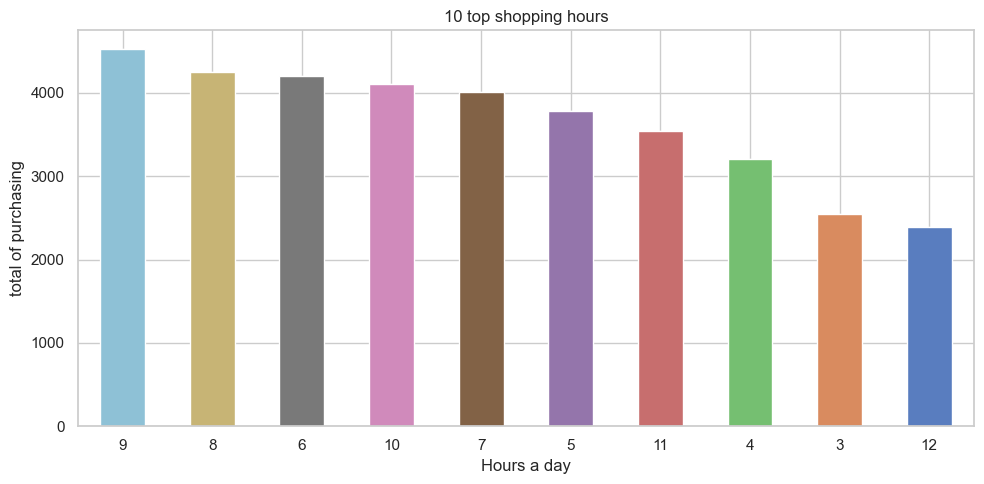

In [20]:
# Research customer buying patterns

#1 Check peak shopping hours

df_purchasing=df[df['event_type']=='purchase']
df_purchase_hourly=df_purchasing.groupby('event_hour').size().reset_index(name='total')
df_purchase_hourly=df_purchase_hourly.sort_values(by='total',ascending=False).head(10)
df_purchase_hourly['event_hour']=df_purchase_hourly['event_hour'].astype(str)
# Drawing a diagram matpoltlib
plt.figure(figsize=(10, 5)) # Width and height in inches
plt.bar(df_purchase_hourly.event_hour,df_purchase_hourly.total, width=0.45)
plt.xlabel('count of purchasing')
plt.ylabel('hours')
plt.title('10 top shopping hours')
plt.grid(axis='y')
plt.tight_layout()
plt.show

# Drawing a diagram by seaborn
plt.Figure(figsize=(10,5))
sns.barplot(df_purchase_hourly,x='event_hour',y='total',palette='muted',hue='total',dodge=False,legend=False,width=0.5)
plt.xlabel('Hours a day')
plt.ylabel('total of purchasing')
plt.grid(None)
plt.tight_layout()
save_plot('10_top_shopping_hours.png')

 

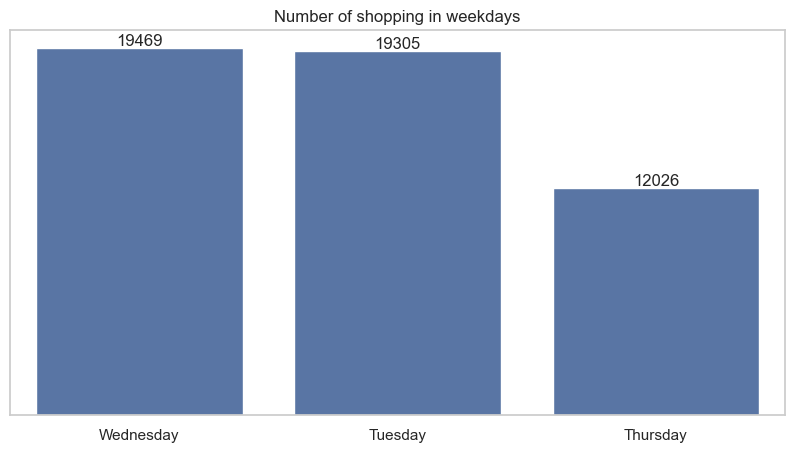

In [51]:
# Research customer buying patterns / shoping per Week days
df['day']=df['event_time'].dt.day_name()
df_per=df[df['event_type']=='purchase'].groupby('day').size().reset_index(name='Number of purchase').sort_values(by='Number of purchase',ascending=False)
df_per.head()
plt.figure(figsize=(10,5))
mybar=sns.barplot(df_per,x='day',y='Number of purchase')
mybar.set_title('Number of shopping in weekdays')
bars = mybar.containers[0]
mybar.bar_label(bars)
mybar.set_yticks([])
mybar.set_xlabel('')
mybar.set_ylabel('')
plt.grid(False)
plt.show()
